In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

path ='/content/drive/MyDrive/Fish.csv'
df = pd.read_csv(path)

df.describe

<bound method NDFrame.describe of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>

In [ ]:
data = pd.read_csv("//content/drive/MyDrive/Fish.csv")
data.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [ ]:
data.isnull().sum(axis = 0)
data.shape

(159, 7)

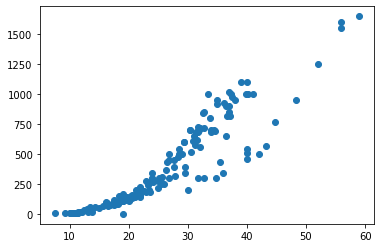

In [ ]:
plt.scatter(data['Length1'],data['Weight'])
plt.show()
#not-linear

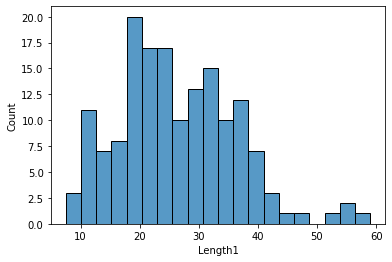

In [ ]:
sns.histplot(data['Length1'], bins=20)

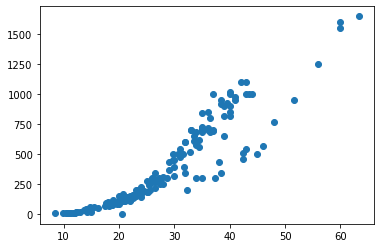

In [ ]:
plt.scatter(data['Length2'],data['Weight'])
plt.show()
#not-linear

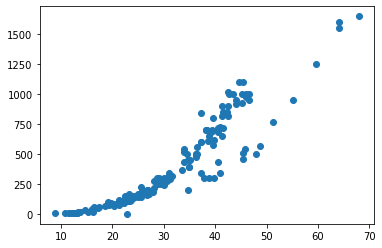

In [ ]:
plt.scatter(data['Length3'],data['Weight'])
plt.show()

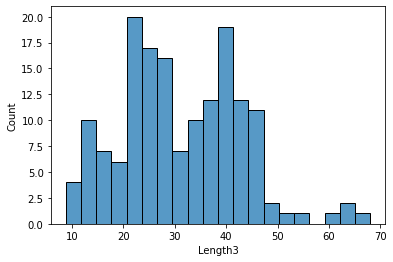

In [ ]:
sns.histplot(data['Length3'], bins=20)

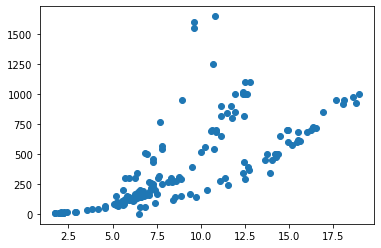

In [ ]:
plt.scatter(data['Height'],data['Weight'])
plt.show()

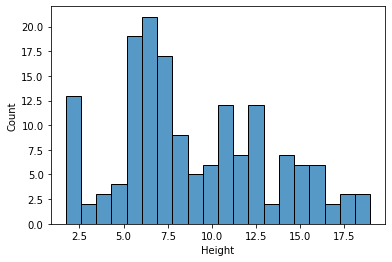

In [ ]:
sns.histplot(data['Height'], bins=20)

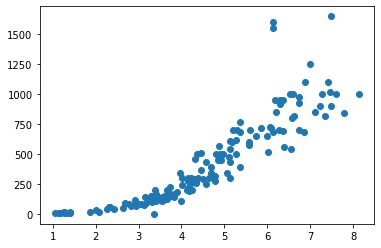

In [ ]:
plt.scatter(data['Width'],data['Weight'])
plt.show()

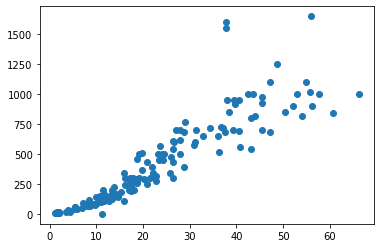

In [ ]:
data['WidthSquared']=data['Width']**2
plt.scatter(data['WidthSquared'],data['Weight'])
plt.show()

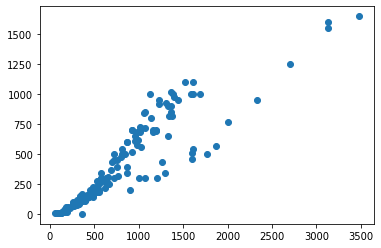

In [ ]:
data['Length1Squared']=data['Length1']**2
plt.scatter(data['Length1Squared'],data['Weight'])
plt.show()

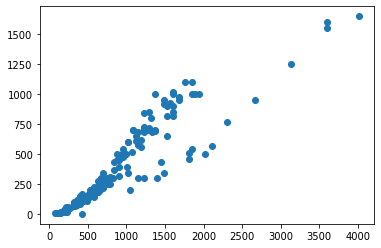

In [ ]:
data['Length2Squared']=data['Length2']**2
plt.scatter(data['Length2Squared'],data['Weight'])
plt.show()

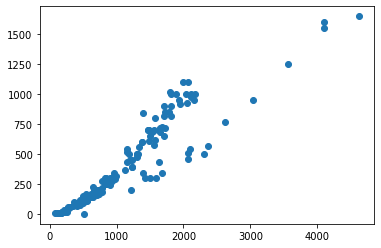

In [ ]:
data['Length3Squared']=data['Length3']**2
plt.scatter(data['Length3Squared'],data['Weight'])
plt.show()

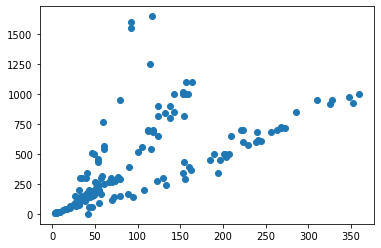

In [ ]:
data['HeightSquared']=data['Height']**2
plt.scatter(data['HeightSquared'],data['Weight'])
plt.show()
#showsHeteroscedasticity

In [ ]:
data.corr()
#remove Length1 & Length2 i.e Highly Correlated

,Weight,Length1,Length2,Length3,Height,Width,WidthSquared,Length1Squared,Length2Squared,Length3Squared,HeightSquared
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507,0.909665,0.911555,0.918270,0.933048,0.679762
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050,0.835214,0.971355,0.973357,0.975102,0.533104
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547,0.839335,0.968249,0.971139,0.974802,0.548747
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520,0.837635,0.952120,0.956824,0.972963,0.618901
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881,0.739312,0.503302,0.521330,0.598269,0.972436
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000,0.974896,0.770849,0.779722,0.795875,0.695692
WidthSquared,0.909665,0.835214,0.839335,0.837635,0.739312,0.974896,1.000000,0.769632,0.777181,0.785761,0.668612
Length1Squared,0.911555,0.971355,0.968249,0.952120,0.503302,0.770849,0.769632,1.000000,0.999546,0.990504,0.429222
Length2Squared,0.918270,0.973357,0.971139,0.956824,0.521330,0.779722,0.777181,0.999546,1.000000,0.993149,0.448793
Length3Squared,0.933048,0.975102,0.974802,0.972963,0.598269,0.795875,0.785761,0.990504,0.993149,1.000000,0.534552


In [ ]:
data=pd.concat([data,pd.get_dummies(data["Species"],drop_first=True)],1)
data=data.drop(['Length1','Length2','Length1Squared','Length2Squared','Species'],axis=1)
data.head()

,Weight,Length3,Height,Width,WidthSquared,Length3Squared,HeightSquared,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,30.0,11.5200,4.0200,16.160400,900.00,132.710400,0,0,0,0,0,0
1,290.0,31.2,12.4800,4.3056,18.538191,973.44,155.750400,0,0,0,0,0,0
2,340.0,31.1,12.3778,4.6961,22.053355,967.21,153.209933,0,0,0,0,0,0
3,363.0,33.5,12.7300,4.4555,19.851480,1122.25,162.052900,0,0,0,0,0,0
4,430.0,34.0,12.4440,5.1340,26.357956,1156.00,154.853136,0,0,0,0,0,0


In [ ]:
X=data.drop(['Weight'],axis=1).values.reshape(-1,12)
Y=data['Weight'].values.reshape(159)

In [ ]:
X = sm.add_constant(X)
est = sm.OLS(Y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     724.4
Date:                Mon, 30 Aug 2021   Prob (F-statistic):          1.58e-123
Time:                        17:11:45   Log-Likelihood:                -833.89
No. Observations:                 159   AIC:                             1694.
Df Residuals:                     146   BIC:                             1734.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -43.8244     65.335     -0.671      0.503    -172.949      85.300
x1           -12.9841      5.897     -2.202      0.029     -24.639      -1.329
x2            29.3134     18.036      1.625      0.106      -6.333      64.960
x3           -81.1630     37.733     -2.151      0.033    -155.736      -6.590
x4            11.7162      2.860      4.097      0.000       6.064      17.368
x5             0.4989      0.050     10.064      0.000       0.401       0.597
x6             0.2636      0.487      0.541      0.589      -0.699       1.227
x7            79.2615     25.451      3.114      0.002      28.962     129.561
x8           165.4377     46.600      3.550      0.001      73.341     257.535
x9            15.3730     80.885      0.190      0.850    -144.484     175.230
x10          127.6843     43.106      2.962      0.004      42.492     212.877
x11          159.2929     62.138      2.564      0.011      36.486     282.099
x12          175.9687     42.435      4.147      0.000      92.102     259.836
==============================================================================
Omnibus:                       17.276   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.164
Skew:                           0.126   Prob(JB):                     1.17e-14
Kurtosis:                       6.102   Cond. No.                     4.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
reg = linear_model.LinearRegression() 

reg.fit(x_train, y_train) 
print('Coefficient : ', reg.coef_,' and Y-Intercept : ',reg.intercept_) 

Coefficient :  [ 0.00000000e+00 -1.03798531e+01  3.44684540e+01 -1.01012019e+02
  1.35837151e+01  4.59136195e-01  2.45838810e-02  8.09470151e+01
  1.74507353e+02  2.66259974e+01  1.42439021e+02  1.69776115e+02
  1.72324654e+02]  and Y-Intercept :  -67.0551248789177


In [ ]:
y_predicted=reg.predict(x_test)
print("Mean Squared error is ", mean_squared_error(y_test,y_predicted))
print("R2 score is ", r2_score(y_test, y_predicted))

Mean Squared error is  2691.4374389554528
R2 score is  0.9800770089334737
